<font size=5><b>UCI Heart Disease EDA (python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/seanbunk/Desktop/Data_Projects/Python/UCI_HeartDisease_EDA/heart_disease_uci.csv')
data.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [2]:
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [3]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
#Check for duplicates
data.duplicated().sum()

0

In [5]:
#Check for null values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
# Renaming columns so they make sense
data = data.rename(columns = {'cp':'chest_pain',
                             'trestbps': 'rest_blood_pressure',
                             'chol':'cholesterol',
                             'fbs': 'fast_blood_sugar',
                             'restecg': 'rest_ekg',
                             'thalch':'max_heart_rate',
                             'exang':'exercise_angina',
                             'ca':'vessels_colored',
                             'num': 'outcome'})
data.columns

Index(['id', 'age', 'sex', 'dataset', 'chest_pain', 'rest_blood_pressure',
       'cholesterol', 'fast_blood_sugar', 'rest_ekg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'slope', 'vessels_colored', 'thal',
       'outcome'],
      dtype='object')

<font size=5><b>Data Cleaning

In [7]:
#dropping null values
data.loc[data['vessels_colored'].isna()]

,id,age,sex,dataset,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,oldpeak,slope,vessels_colored,thal,outcome
166,167,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,NaN,normal,0
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,NaN,reversable defect,1
287,288,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,NaN,reversable defect,0
302,303,38,Male,Cleveland,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,upsloping,NaN,normal,0
303,304,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
# dropping column 'vessels_colored','thal','slope','oldpeak' becuase of NaN values

data = data.drop(columns= ['vessels_colored','thal','slope','oldpeak'])

In [9]:
data.isnull().sum()

id                      0
age                     0
sex                     0
dataset                 0
chest_pain              0
rest_blood_pressure    59
cholesterol            30
fast_blood_sugar       90
rest_ekg                2
max_heart_rate         55
exercise_angina        55
outcome                 0
dtype: int64

In [10]:
#fill the NaN with median
columns_to_fill = ['cholesterol', 'max_heart_rate', 'exercise_angina',]
for column in columns_to_fill:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)


In [11]:
#fill values for 'fast_blood_sugar' with mode
fast_blood_sugar_mode = data['fast_blood_sugar'].mode()[0]
data['fast_blood_sugar'] = data['fast_blood_sugar'].fillna(fast_blood_sugar_mode)

#fill NaN with mode 'rest_ekg' and 'rest_blood_pressure'
rest_ekg_mode = data['rest_ekg'].mode()[0]
data['rest_ekg'] = data['rest_ekg'].fillna(rest_ekg_mode)

# Calculate the mean of the 'rest_blood_pressure' column
rest_blood_pressure_mean = data['rest_blood_pressure'].mean()
# Fill NaN values for 'rest_blood_pressure' with its mean
data['rest_blood_pressure'] = data['rest_blood_pressure'].fillna(rest_blood_pressure_mean)


In [12]:
data.isnull().sum()

id                     0
age                    0
sex                    0
dataset                0
chest_pain             0
rest_blood_pressure    0
cholesterol            0
fast_blood_sugar       0
rest_ekg               0
max_heart_rate         0
exercise_angina        0
outcome                0
dtype: int64

<font size=5><b>How does the age distribution look in the dataset, and does age show any clear patterns in relation to heart disease (outcome)?

In [13]:
data['age'].describe()
#average age is 53

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

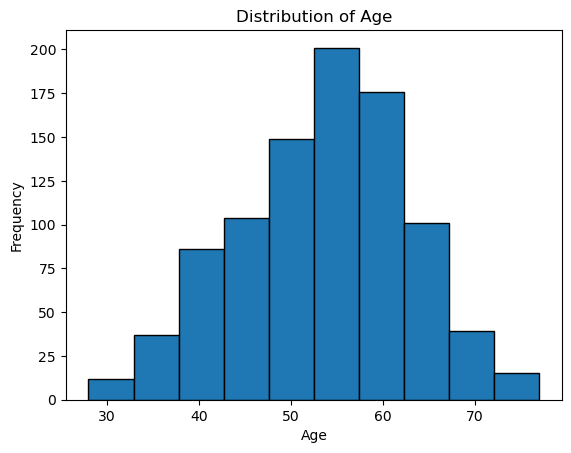

In [14]:
plt.hist(data['age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<font size=3><b>Legend - 
0: The absense of heart disease
1: Presence of heart disease with mild symptoms or minimal narrowing of one blood vessel.
2: Presence of heart disease with moderate symptoms or narrowing of two vessels.
3: Severe symptoms or narrowing of three vessels.
4: Very severe heart disease, possibly including heart failure or a severe narrowing of the main artery or all major vessels.</b></font>

In [15]:
data['outcome'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: outcome, dtype: int64

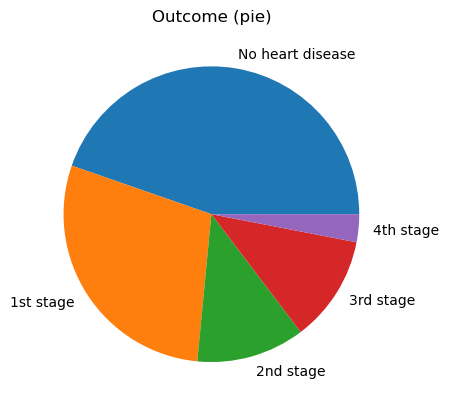

In [16]:
plt.pie(data['outcome'].value_counts(), labels = ['No heart disease','1st stage', '2nd stage', '3rd stage', '4th stage'])
plt.title("Outcome (pie)")
plt.show()

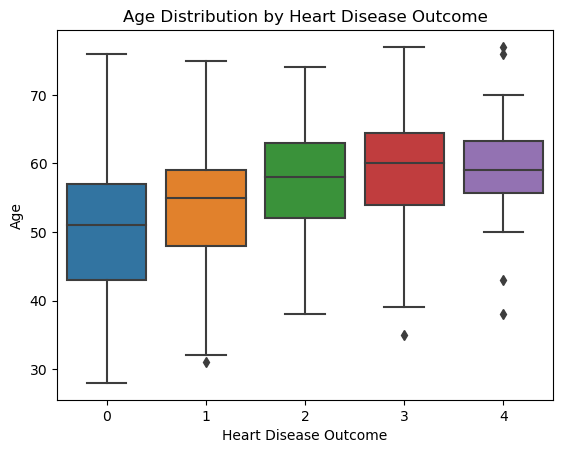

In [17]:
sns.boxplot(x='outcome', y='age', data=data)
plt.title('Age Distribution by Heart Disease Outcome')
plt.xlabel('Heart Disease Outcome')
plt.ylabel('Age')
plt.show()

#Legend - 
# 0: The absense of heart disease
# 1: Presence of heart disease with mild symptoms or minimal narrowing of one blood vessel.
# 2: Presence of heart disease with moderate symptoms or narrowing of two vessels.
# 3: Severe symptoms or narrowing of three vessels.
# 4: Very severe heart disease, possibly including heart failure or a severe narrowing of the main artery or all major vessels.

In [18]:
correlation = data[['age','outcome']].corr()
correlation

,age,outcome
age,1.000000,0.339596
outcome,0.339596,1.000000


<font size=3><b>Correlation suggests a positive correlation between age and outcome.  As age increases there is a tendancy for the outcome variable to also increase.  However, this correlation is not very strong.

<font size=5><b>Are there any noticeable differences in heart disease incidence between different genders?  How does the severity or type of heart disease vary between males and females?

In [19]:
data['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

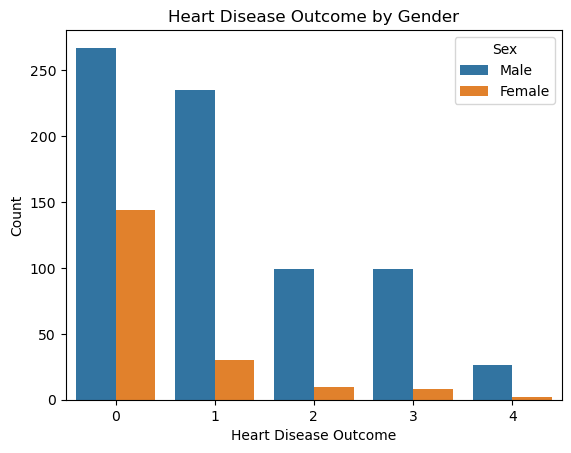

In [20]:
sns.countplot(x='outcome', hue='sex', data=data)
plt.title('Heart Disease Outcome by Gender')
plt.xlabel('Heart Disease Outcome')
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()

<font size=3><b>Males seem to have a higher Heart Disease Outcome than Females.

<font size=5><b>What types of chest pain (as indicated by 'chest_pain' column) are most common in patients, and how are they related to heart disease outcomes?

In [21]:
data['chest_pain'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: chest_pain, dtype: int64

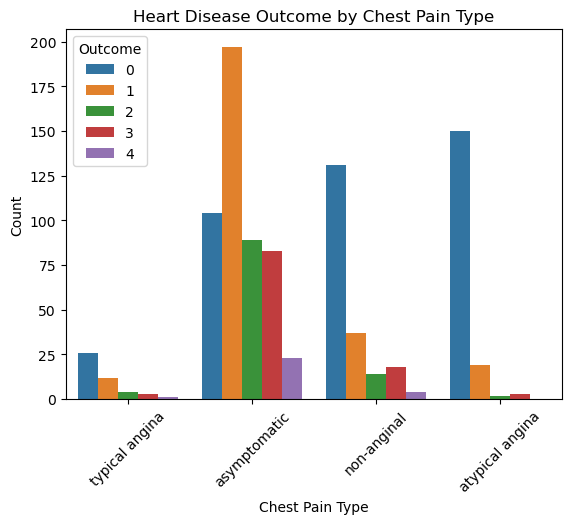

In [22]:
sns.countplot(x='chest_pain', hue= 'outcome', data=data)
plt.title('Heart Disease Outcome by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.show()

<font size=3><b>Asymptomatic chest pain type has the highest number of pts asscociated with heart disease outcomes.  

<font size=5><b>How do cholesterol levels vary among patients, and isthere a noticeable relationship between cholesterol levels and heart disease severity?

In [23]:
data['cholesterol'].describe()

count    920.000000
mean     199.908696
std      109.040171
min        0.000000
25%      177.750000
50%      223.000000
75%      267.000000
max      603.000000
Name: cholesterol, dtype: float64

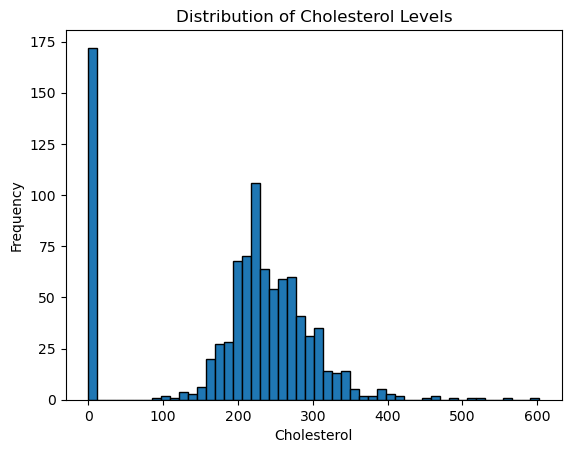

In [24]:
plt.hist(data['cholesterol'], bins=50, edgecolor='black')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel('Frequency')
plt.show()

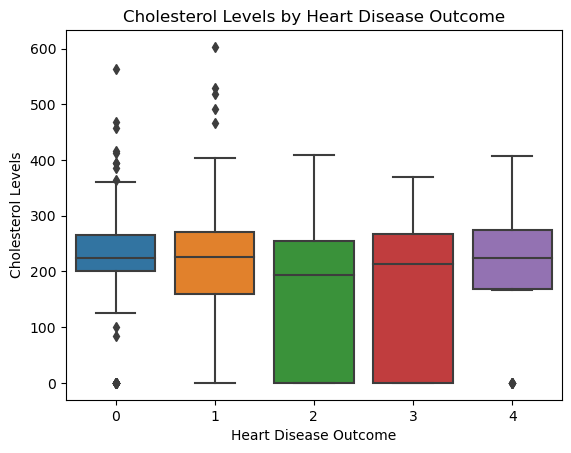

In [25]:
sns.boxplot(x='outcome', y='cholesterol', data=data)
plt.title('Cholesterol Levels by Heart Disease Outcome')
plt.xlabel('Heart Disease Outcome')
plt.ylabel('Cholesterol Levels')
plt.show()


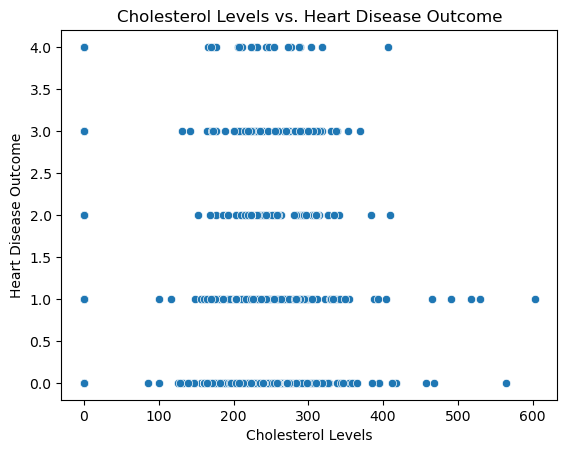

In [26]:
sns.scatterplot(x='cholesterol', y= 'outcome', data=data)
plt.title('Cholesterol Levels vs. Heart Disease Outcome')
plt.xlabel('Cholesterol Levels')
plt.ylabel("Heart Disease Outcome")
plt.show()

In [27]:
group_average_cholesterol = data.groupby('outcome')['cholesterol'].mean()
group_average_cholesterol

outcome
0    227.678832
1    195.988679
2    145.311927
3    160.308411
4    193.250000
Name: cholesterol, dtype: float64

<font size=3><b>Both plots emphasize the complexity between cholesterol and heart disease, higher cholesterol does not directly equate to a higher category of heart disease outcome.

<font size=5><b>How does the presence of exercise-induced angina ('exercise_angina') relate to heart disease outcomes? Does it significantly increase the risk or severity of heart disease?

In [28]:
data['exercise_angina'].value_counts()

False    583
True     337
Name: exercise_angina, dtype: int64

In [29]:
crosstab = pd.crosstab(data['exercise_angina'], data['outcome'])
print(crosstab)

outcome            0    1   2   3   4
exercise_angina                      
False            356  120  51  43  13
True              55  145  58  64  15


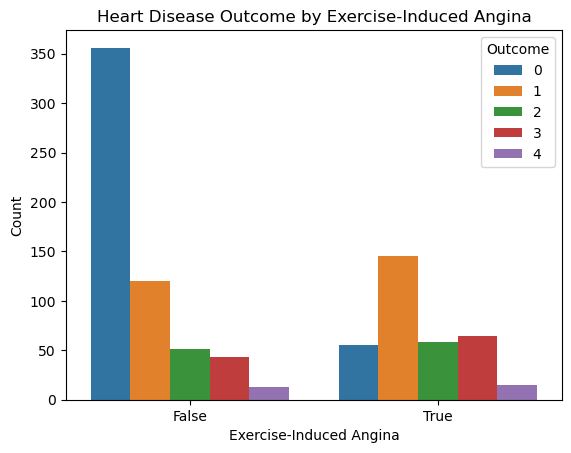

In [30]:
sns.countplot(x='exercise_angina', hue='outcome', data=data)
plt.title("Heart Disease Outcome by Exercise-Induced Angina")
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()
##Legend - 
# 0: The absense of heart disease
# 1: Presence of heart disease with mild symptoms or minimal narrowing of one blood vessel.
# 2: Presence of heart disease with moderate symptoms or narrowing of two vessels.
# 3: Severe symptoms or narrowing of three vessels.
# 4: Very severe heart disease.

<font size=3><b>A large number of individuals without exercise-induced angina fall into the 'no heart disease' category.  There appears to be a trend where the presence of exercise-induced angina is associated with more severe outcomes of heart disease.

<font size=5><b>What insights can be derived from the rest EKG ('rest_ekg') results? Are there specific patterns or abnormalities that are more commonly associated with severe heart disease outcomes?

<font size=3><b>- LV hypertrophy' stands for left ventricular hypertrophy. This condition is characterized by the thickening of the muscular walls of the heart's left ventricle, which is the main pumping chamber.

<font size=3><b>- A 'normal' ECG means that the electrical activity of the heart is displaying a typical pattern, without any significant abnormalities detected. 

<font size=3><b>- Abnormalities in the ST segment and T wave can indicate a range of issues, including ischemia (reduced blood flow to the heart), electrolyte imbalances, and other cardiac conditions.

In [31]:
data['rest_ekg'].value_counts()

normal              553
lv hypertrophy      188
st-t abnormality    179
Name: rest_ekg, dtype: int64

In [32]:
crosstab = pd.crosstab(data['rest_ekg'], data['outcome'])
print(crosstab)

outcome             0    1   2   3   4
rest_ekg                              
lv hypertrophy     82   45  22  26  13
normal            268  172  55  50   8
st-t abnormality   61   48  32  31   7


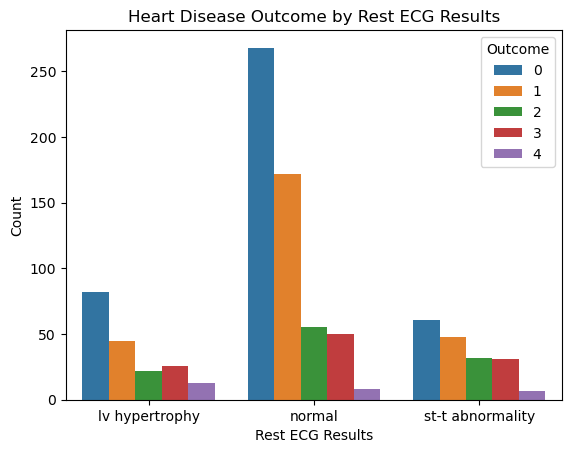

In [33]:
sns.countplot(x='rest_ekg', hue= 'outcome', data=data)
plt.title('Heart Disease Outcome by Rest ECG Results')
plt.xlabel('Rest ECG Results')
plt.ylabel('Count')
plt.legend(title="Outcome")
plt.show()

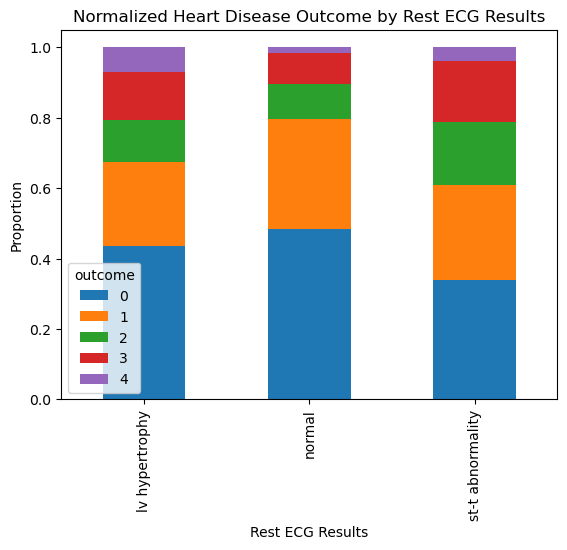

In [34]:
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis = 0)
crosstab_norm.plot(kind='bar', stacked=True)
plt.title('Normalized Heart Disease Outcome by Rest ECG Results')
plt.xlabel('Rest ECG Results')
plt.ylabel('Proportion')
plt.show()

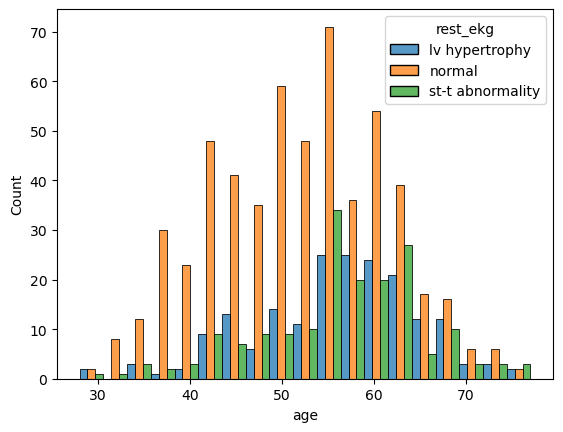

In [35]:
sns.histplot(x = data.age,
            hue = data.rest_ekg,
            multiple = 'dodge')
plt.show()

<font size=3><b>*The 'lv hypertrophy' category, for example, seems to have a relatively larger proportion of individuals with 'outcome' 0 (no heart disease) compared to the other categories.

<font size=3><b>*The 'normal' category appears to have a more even distribution across the various outcomes, indicating no strong bias toward severe or no heart disease.

<font size=3><b>*The 'st-t abnormality' category shows a distribution where there is a substantial proportion of individuals across more severe heart disease outcomes (1-4).

<font size=5><b>How does the distribution of resting blood pressure vary across different ages in the dataset?

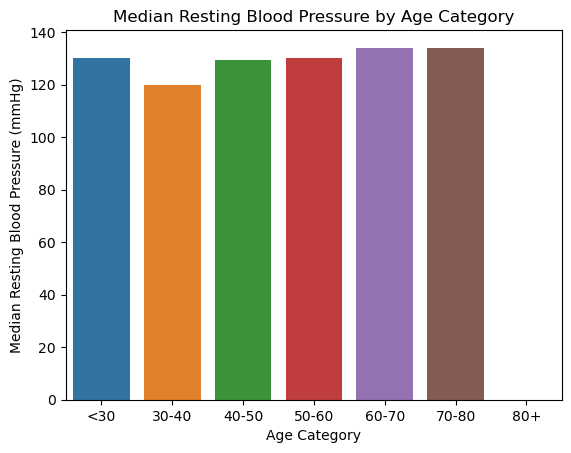

In [36]:
data['age_category'] = pd.cut(data['age'], bins=[0,30,40,50,60,70,80,90],
                       labels=['<30','30-40','40-50','50-60','60-70','70-80','80+'])

median_bp_by_age= data.groupby('age_category')['rest_blood_pressure'].median().reset_index()

sns.barplot(x='age_category', y='rest_blood_pressure', data= median_bp_by_age)
plt.title('Median Resting Blood Pressure by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Median Resting Blood Pressure (mmHg)')
plt.show()
                

<font size=3><b>The above shows how resting blood pressure changes with age in this dataset.